In [2]:
from scipy import signal, interpolate
import matplotlib.pyplot as plt
import numpy as np


In [2]:
filename='toto.csv'
sampleRate=125#Hz
newRate=200#Hz
duration=4
x = np.arange(0,duration,1/sampleRate)
y = np.cos(-x**duration/6.0)
f = signal.resample(y, duration*newRate)

xx = np.arange(0,duration,1/newRate)
yy=np.interp(xx,x,y)

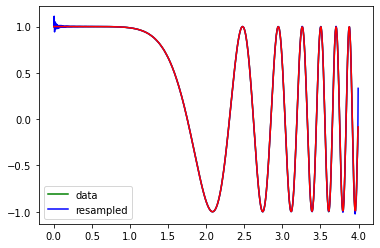

In [3]:
plt.plot(x, y, 'g-', xx, f, 'b-', xx, yy, 'r-')
plt.legend(['data', 'resampled'], loc='best')
plt.show()

# Test de filtre

In [4]:

s1=np.random.normal(10, 0.3, 1000)
s2=np.random.normal(6, 0.3, 1000)
sensor_data=np.array([s1,s2])


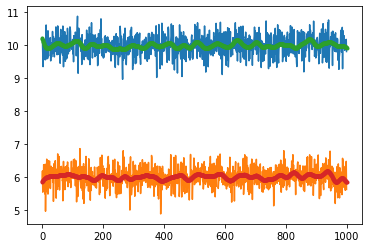

In [5]:
b, a = signal.butter(4, 5/(200/2), 'lowpass')
sensor_data_f=signal.filtfilt(b,a,sensor_data)
plt.plot(sensor_data.T, '-',sensor_data_f.T,'.')
plt.show()

# Test correlation matrix

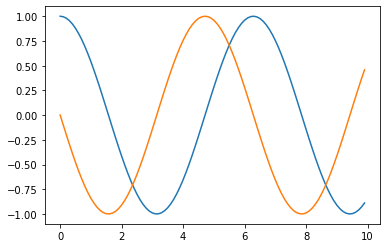

In [6]:
x = np.arange(0,10,1/10)
s1 = np.cos(x)
s2 = np.cos(x+np.pi/2)
S=np.array([s1,s2])
plt.plot(x,S.T)
plt.show()

Signaux d'origine <br>
<br>
## Calcul de la correlation pour chaque lag

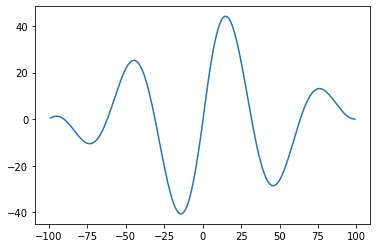

algo find a lag of 15 frames


In [7]:
cor=signal.correlate(s1,s2, mode="full")
lags = signal.correlation_lags(s1.size, s2.size, mode="full")
lag = lags[np.argmax(cor)]
plt.plot(lags,cor)
plt.show()
print("algo find a lag of {} frames".format(lag))

## Synchronisation des signaux

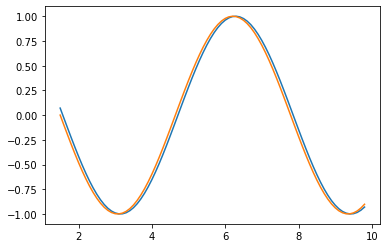

In [8]:
t_x=x[round(abs(lag)):-1]
t_s1=S.T[round(abs(lag)):-1,0]
t_s2=S.T[0:-round(abs(lag))-1,1]
t_S=np.array([t_s1,t_s2])
plt.plot(t_x,t_S.T)
plt.show()

# Correlation pour chaque fenetre de temps

In [9]:
x = np.arange(0,20,1/200)
s1 = np.cos(x)
s2 = np.cos(x+np.pi/2)
S=np.array([s1,s2])
cor=signal.correlate(s1,s2, mode="full")
lags = signal.correlation_lags(s1.size, s2.size, mode="full")
lag = lags[np.argmax(cor)]
t_x=x[round(abs(lag)):-1]
t_s1=S.T[round(abs(lag)):-1,0]
t_s2=S.T[0:-round(abs(lag))-1,1]
t_S=np.array([t_s1,t_s2])

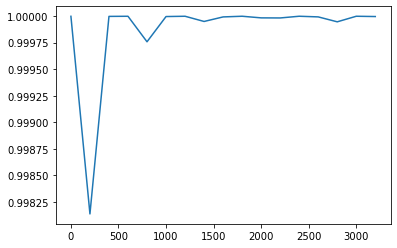

In [10]:
y_r=np.array([],dtype=float)
x_r=np.arange(0,len(t_s1)-400,200)
#np.corrcoef(t_s1[200:400],t_s2[200:400])[0,1]
for w in x_r:
    y_r=np.append(y_r,np.corrcoef(t_s1[w:w+200],t_s2[w:w+200])[0,1])
plt.plot(x_r,y_r)
plt.show()

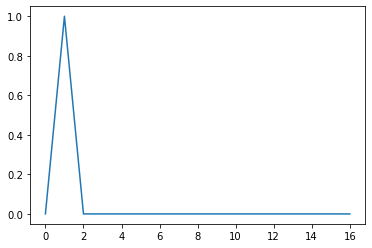

In [11]:
plt.plot(abs(y_r)<0.999)
plt.show()

# Analyse fréquentielle

400


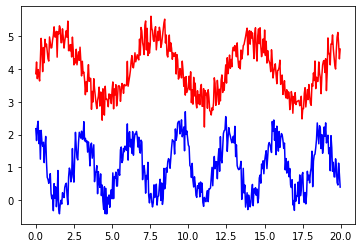

In [26]:
x = np.arange(0,20,1/20)
print(len(x))
s1=np.random.normal(1, 0.3, 400)+np.cos(x*2)
s2=np.random.normal(4, 0.3, 400)+np.sin(x)
plt.plot(x,s1,'b',x,s2,'r')
plt.show()

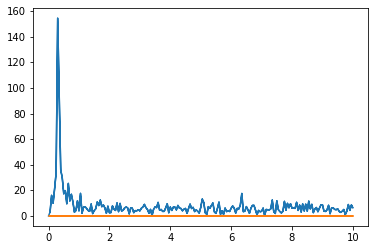

In [27]:
sp=abs(np.fft.fft(signal.detrend(s1)))
freq=np.fft.fftfreq(s1.shape[-1])*20
plt.plot(abs(freq),sp.real,abs(freq), sp.imag)
plt.show()


20


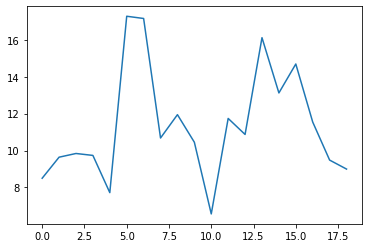

In [50]:
f_w=np.array([],dtype=float)
freq
print(len(freq))
for w in np.arange(0,20-1,1):
    fft=abs(np.fft.fft(signal.detrend(s1[w:w+20])))
    freq=np.fft.fftfreq(fft.shape[-1])*20
    walk_mask=np.logical_and(abs(freq)>0, abs(freq)<3)
    fog_mask=np.logical_and(abs(freq)>3, abs(freq)<10)
    f_w=np.append(f_w,sum(fft.real[fog_mask])**2/sum(fft.real[walk_mask])**2)
    
plt.plot(np.arange(0,20-1,1),f_w)


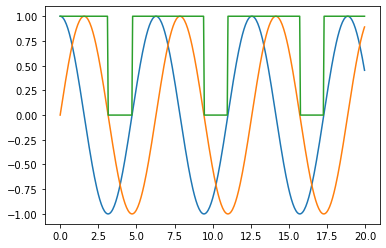

In [55]:
x = np.arange(0,20,1/20)
s1=np.cos(x)
s2=np.sin(x)
plt.plot(x,s1,x,s2)
plt.plot(x,np.logical_or(s1>0,s2>0))